# 아침 점심 저녁 평균내서 클러스터링

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df1 = pd.read_csv('./data3.csv')

In [3]:
df2 = df1.dropna()

In [4]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%Y/%m/%d')
df2 = df2.set_index("Time")
df2 = df2.drop(['ID'], axis='columns')

<ipython-input-4-9770fb95153c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = pd.to_datetime(df2['Time'], format='%Y/%m/%d')


In [96]:
month5 = df2['2018-05']

In [97]:
month5 = month5.iloc[:, 2:]

In [98]:
month5['day'] = month5.index.strftime("%d")

In [99]:
month5.head()

,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,cbcc2b02,f69df1a6,...,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a,day
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:00,0.173,0.310,0.193,0.509,0.458,0.555,0.365,0.548,0.226,0.157,...,0.348,0.220,0.191,0.247,0.378,0.439,0.235,0.535,0.280,01
2018-05-01 01:00:00,0.152,0.248,0.275,0.488,0.590,0.515,0.356,0.620,0.160,0.161,...,0.321,0.135,0.149,0.253,0.386,0.218,0.199,0.414,0.267,01
2018-05-01 02:00:00,0.162,0.206,0.192,0.498,0.589,0.536,0.417,0.580,0.130,0.144,...,0.281,0.106,0.145,0.247,0.377,0.250,0.215,0.237,0.254,01
2018-05-01 03:00:00,0.148,0.159,0.174,0.490,0.580,0.479,0.403,0.306,0.129,0.119,...,0.129,0.104,0.143,0.250,0.354,0.229,0.205,0.249,0.271,01
2018-05-01 04:00:00,0.154,0.189,0.196,0.468,0.407,0.297,0.345,0.191,0.128,0.149,...,0.129,0.103,0.139,0.237,0.436,0.269,0.222,0.248,0.277,01


In [100]:
month5['time'] = "2"
month5.loc[month5.index.hour < 8, 'time'] = "1"
month5.loc[month5.index.hour >= 16, 'time'] = "3"

In [101]:
month5 = month5.groupby(['day', 'time']).mean()

In [115]:
month5 = month5.T
month5.head()

d6fd26b7  410b92b1  2c993de7  1243cee2  b01fe23c  28cf72fb  \
day time                                                               
01  1     0.155750  0.227500  0.205250   0.45050  0.498500  0.424500   
    2     0.286250  0.211000  0.340875   0.10850  0.443500  0.246375   
    3     0.290375  0.282250  0.281375   0.37475  0.303625  0.453125   
02  1     0.235500  0.202625  0.244375   0.46275  0.301875  0.257750   
    2     1.196000  0.199125  0.333625   0.11175  0.569875  0.140875   

          6b5790f4  1338c9d0  cbcc2b02  f69df1a6  ...  7c9fd8fa  7bee82cf  \
day time                                          ...                       
01  1     0.363875  0.345375  0.171750  0.153125  ...  0.196500  0.235250   
    2     0.440750  0.459625  0.435750  0.349000  ...  0.204000  0.136375   
    3     0.391375  0.582125  0.315625  0.536750  ...  0.267750  0.280625   
02  1     0.423875  0.458500  0.198125  0.241750  ...  0.177875  0.227625   
    2     0.159875  0.430750  0.186625  0.203250  ...  0.213500  0.120000   

          673a845b  bd3aacbe  cdac7a59  bb36497c  72b0eb5a  d1eb9544  \
day time                                                               
01  1     0.130625  0.131875  0.272625  0.473875  0.258375  0.274875   
    2     0.200000  0.178750  0.440875  0.218750  0.278875  0.349250   
    3     0.389625  0.097750  0.550875  0.635875  0.454000  0.416125   
02  1     0.130125  0.097000  0.331250  0.456125  0.234625  0.285500   
    2     0.150500  0.173375  0.577000  0.246500  0.243625  0.182875   

          6ca41156  ab7a314a  
day time                      
01  1     0.357000  0.263250  
    2     0.256750  0.235875  
    3     0.596500  0.248375  
02  1     0.352750  0.254125  
    2     0.245875  0.170875  

[5 rows x 354 columns]

In [200]:
month5.T.head()

day            01                            02                            03  \
time            1         2         3         1         2         3         1   
d6fd26b7  0.15575  0.286250  0.290375  0.235500  1.196000  0.623250  0.230250   
410b92b1  0.22750  0.211000  0.282250  0.202625  0.199125  0.357375  0.264375   
2c993de7  0.20525  0.340875  0.281375  0.244375  0.333625  0.299625  0.188625   
1243cee2  0.45050  0.108500  0.374750  0.462750  0.111750  0.360250  0.436625   
b01fe23c  0.49850  0.443500  0.303625  0.301875  0.569875  0.529875  0.232750   

day                                 04  ...        28        29            \
time             2         3         1  ...         3         1         2   
d6fd26b7  1.312125  0.617625  0.230750  ...  0.637286  0.209000  1.375167   
410b92b1  0.229500  0.323500  0.248875  ...  0.347571  0.213714  0.200833   
2c993de7  0.356750  0.304125  0.212000  ...  0.414571  0.215857  0.428333   
1243cee2  0.155375  0.350750  0.423375  ...  0.225286  0.186857  0.181333   
b01fe23c  0.608375  0.475375  0.266500  ...  0.378857  0.208571  0.571000   

day                       30                            31                      
time             3         1         2         3         1         2         3  
d6fd26b7  0.630625  0.229000  1.242500  0.555625  0.260875  1.265875  0.611875  
410b92b1  0.352875  0.205500  0.165167  0.422000  0.189875  0.288500  0.374125  
2c993de7  0.340875  0.217000  0.335833  0.387625  0.222625  0.424625  0.372500  
1243cee2  0.242125  0.196750  0.134667  0.205625  0.192125  0.157625  0.221750  
b01fe23c  0.467250  0.285625  0.420667  0.433875  0.328625  0.467500  0.410500  

[5 rows x 93 columns]

In [104]:
def kmeans(feature):
    model = KMeans(n_clusters=3,max_iter=500, algorithm='auto')
    model.fit(feature)
    predict = pd.DataFrame(model.predict(feature))
    predict.columns=['predict']
#     return predict
    array = np.hstack([feature, predict])
    return pd.DataFrame(array, index=feature.index)

In [105]:
result = kmeans(month5)

In [116]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
d6fd26b7,0.15575,0.286250,0.290375,0.235500,1.196000,0.623250,0.230250,1.312125,0.617625,0.230750,...,0.209000,1.375167,0.630625,0.229000,1.242500,0.555625,0.260875,1.265875,0.611875,2.0
410b92b1,0.22750,0.211000,0.282250,0.202625,0.199125,0.357375,0.264375,0.229500,0.323500,0.248875,...,0.213714,0.200833,0.352875,0.205500,0.165167,0.422000,0.189875,0.288500,0.374125,0.0
2c993de7,0.20525,0.340875,0.281375,0.244375,0.333625,0.299625,0.188625,0.356750,0.304125,0.212000,...,0.215857,0.428333,0.340875,0.217000,0.335833,0.387625,0.222625,0.424625,0.372500,0.0
1243cee2,0.45050,0.108500,0.374750,0.462750,0.111750,0.360250,0.436625,0.155375,0.350750,0.423375,...,0.186857,0.181333,0.242125,0.196750,0.134667,0.205625,0.192125,0.157625,0.221750,1.0
b01fe23c,0.49850,0.443500,0.303625,0.301875,0.569875,0.529875,0.232750,0.608375,0.475375,0.266500,...,0.208571,0.571000,0.467250,0.285625,0.420667,0.433875,0.328625,0.467500,0.410500,2.0


In [107]:
from sklearn.decomposition import PCA

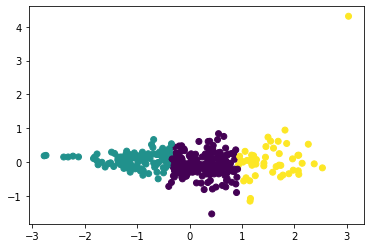

In [114]:
pca = PCA(n_components=2)
X = pca.fit_transform(result.iloc[:, :93])
plt.scatter(X[:, 0], X[:, 1], c = result.iloc[:, 93])

In [124]:
df2.head()

,Season,Weekday,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,...,7c9fd8fa,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-26 12:00:00,Winter,Tuesday,3.470,0.174,0.638,0.192,0.121,0.372,0.094,0.088,...,0.189,0.358,0.083,0.186,0.660,0.194,0.181,0.167,0.273,0.143
2017-12-26 13:00:00,Winter,Tuesday,3.261,0.175,0.542,0.189,0.121,0.355,0.073,0.070,...,0.165,0.135,0.113,0.194,0.759,0.168,0.347,0.215,0.369,0.128
2017-12-26 14:00:00,Winter,Tuesday,1.796,0.212,0.637,0.185,0.379,0.387,0.246,0.086,...,0.280,0.112,0.085,0.219,0.597,0.191,1.060,0.186,0.454,0.133
2017-12-26 15:00:00,Winter,Tuesday,1.708,0.171,0.492,0.200,0.601,0.451,0.473,0.274,...,0.171,0.106,0.125,0.197,0.589,0.155,0.562,0.165,0.472,0.133
2017-12-26 16:00:00,Winter,Tuesday,1.548,0.183,0.952,0.178,0.228,0.642,0.172,0.223,...,0.177,0.106,0.172,0.218,0.623,0.192,0.948,0.605,0.479,0.129


# 일주일 데이터

In [191]:
df3 = df2.iloc[:, 2:]

In [201]:
df3 = df2

In [202]:
df3 = df3.loc['2018-05-07' : '2018-05-13']

In [204]:
df3

,Season,Weekday,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,...,7c9fd8fa,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-07 00:00:00,Spring,Monday,0.154,0.352,0.543,0.112,0.512,0.435,0.308,0.286,...,0.145,0.309,0.128,0.144,0.410,0.708,0.667,0.184,0.422,0.238
2018-05-07 01:00:00,Spring,Monday,0.150,0.218,0.508,0.099,0.425,0.444,0.568,0.300,...,0.163,0.232,0.107,0.112,0.249,0.412,0.264,0.147,0.208,0.239
2018-05-07 02:00:00,Spring,Monday,0.153,0.209,0.508,0.096,0.278,0.442,0.437,0.401,...,0.172,0.226,0.108,0.102,0.260,0.427,0.201,0.235,0.258,0.222
2018-05-07 03:00:00,Spring,Monday,0.150,0.179,0.543,0.090,0.155,0.401,0.385,0.395,...,0.148,0.222,0.107,0.100,0.278,0.474,0.212,0.221,0.196,0.232
2018-05-07 04:00:00,Spring,Monday,0.279,0.209,0.520,0.098,0.120,0.188,0.417,0.392,...,0.154,0.210,0.110,0.088,0.322,0.562,0.227,0.204,0.163,0.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-13 19:00:00,Spring,Sunday,0.172,0.332,0.476,0.213,0.443,0.817,0.513,0.398,...,0.554,0.113,0.495,0.143,0.542,0.897,0.198,0.341,0.882,0.246
2018-05-13 20:00:00,Spring,Sunday,0.137,0.602,0.697,0.198,0.699,0.622,0.200,0.742,...,0.377,0.112,0.687,0.147,0.569,0.878,0.173,0.403,0.834,0.481
2018-05-13 21:00:00,Spring,Sunday,0.142,0.596,0.726,0.246,0.795,0.534,0.241,0.677,...,0.263,0.111,0.414,0.225,0.569,0.903,0.352,0.370,0.753,0.476


In [173]:
graph = df3
graph = graph.resample('1D').mean()
graph = graph.iloc[:, 10:20]

In [174]:
graph

,aa71b3cb,08ca25cc,0583b3a6,11c1d3af,c5b2795b,417407c0,949c8301,3b7d937e,f3c1791c,82c7ecbb
Time,,,,,,,,,,
2018-05-07,0.285750,0.474375,0.491833,0.554083,0.489042,0.177208,0.418500,0.350583,0.209125,0.339208
2018-05-08,0.266957,0.362261,0.342870,0.557696,0.438826,0.185000,0.393261,0.266826,0.145217,0.346043
2018-05-09,0.230625,0.320083,0.425125,0.498125,0.395583,0.212042,0.363917,0.283000,0.169083,0.341000
2018-05-10,0.212042,0.328000,0.330667,0.499292,0.458167,0.191250,0.414500,0.244958,0.217167,0.280500
2018-05-11,0.234792,0.363417,0.441375,0.506125,0.476667,0.231458,0.376292,0.297750,0.147583,0.311292
2018-05-12,0.286542,0.406667,0.389833,0.537000,0.581125,0.213792,0.366208,0.346708,0.164458,0.327667
2018-05-13,0.229625,0.448708,0.400625,0.604583,0.349458,0.234458,0.461958,0.323083,0.164708,0.351125


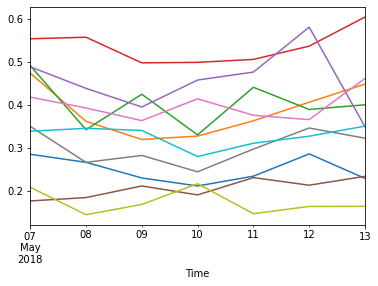

In [175]:
graph.plot(legend=False)
plt.show()

In [193]:
result = kmeans(df3)
result.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-07 00:00:00,0.154,0.352,0.543,0.112,0.512,0.435,0.308,0.286,0.094,0.298,...,0.309,0.128,0.144,0.410,0.708,0.667,0.184,0.422,0.238,1.0
2018-05-07 01:00:00,0.150,0.218,0.508,0.099,0.425,0.444,0.568,0.300,0.104,0.209,...,0.232,0.107,0.112,0.249,0.412,0.264,0.147,0.208,0.239,1.0
2018-05-07 02:00:00,0.153,0.209,0.508,0.096,0.278,0.442,0.437,0.401,0.095,0.153,...,0.226,0.108,0.102,0.260,0.427,0.201,0.235,0.258,0.222,1.0
2018-05-07 03:00:00,0.150,0.179,0.543,0.090,0.155,0.401,0.385,0.395,0.097,0.149,...,0.222,0.107,0.100,0.278,0.474,0.212,0.221,0.196,0.232,1.0
2018-05-07 04:00:00,0.279,0.209,0.520,0.098,0.120,0.188,0.417,0.392,0.101,0.130,...,0.210,0.110,0.088,0.322,0.562,0.227,0.204,0.163,0.242,1.0


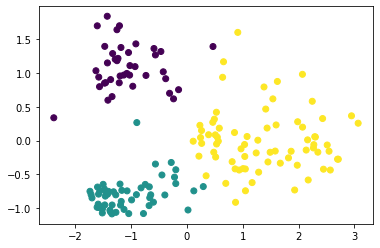

In [194]:
pca = PCA(n_components=2)
X = pca.fit_transform(result.iloc[:, :354])
plt.scatter(X[:, 0], X[:, 1], c = result.iloc[:, 354])

In [186]:
df3 = df3.T

In [206]:
df3

,Season,Weekday,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,...,7c9fd8fa,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-07 00:00:00,Spring,Monday,0.154,0.352,0.543,0.112,0.512,0.435,0.308,0.286,...,0.145,0.309,0.128,0.144,0.410,0.708,0.667,0.184,0.422,0.238
2018-05-07 01:00:00,Spring,Monday,0.150,0.218,0.508,0.099,0.425,0.444,0.568,0.300,...,0.163,0.232,0.107,0.112,0.249,0.412,0.264,0.147,0.208,0.239
2018-05-07 02:00:00,Spring,Monday,0.153,0.209,0.508,0.096,0.278,0.442,0.437,0.401,...,0.172,0.226,0.108,0.102,0.260,0.427,0.201,0.235,0.258,0.222
2018-05-07 03:00:00,Spring,Monday,0.150,0.179,0.543,0.090,0.155,0.401,0.385,0.395,...,0.148,0.222,0.107,0.100,0.278,0.474,0.212,0.221,0.196,0.232
2018-05-07 04:00:00,Spring,Monday,0.279,0.209,0.520,0.098,0.120,0.188,0.417,0.392,...,0.154,0.210,0.110,0.088,0.322,0.562,0.227,0.204,0.163,0.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-13 19:00:00,Spring,Sunday,0.172,0.332,0.476,0.213,0.443,0.817,0.513,0.398,...,0.554,0.113,0.495,0.143,0.542,0.897,0.198,0.341,0.882,0.246
2018-05-13 20:00:00,Spring,Sunday,0.137,0.602,0.697,0.198,0.699,0.622,0.200,0.742,...,0.377,0.112,0.687,0.147,0.569,0.878,0.173,0.403,0.834,0.481
2018-05-13 21:00:00,Spring,Sunday,0.142,0.596,0.726,0.246,0.795,0.534,0.241,0.677,...,0.263,0.111,0.414,0.225,0.569,0.903,0.352,0.370,0.753,0.476


In [187]:
result = kmeans(df3)

In [190]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
d6fd26b7,0.154,0.150,0.153,0.150,0.279,0.175,0.159,0.152,0.151,0.150,...,0.141,0.140,0.260,0.296,0.172,0.137,0.142,0.141,0.237,1.0
410b92b1,0.352,0.218,0.209,0.179,0.209,0.173,0.188,0.180,0.180,0.166,...,0.287,0.355,0.221,0.480,0.332,0.602,0.596,0.443,0.346,2.0
2c993de7,0.543,0.508,0.508,0.543,0.520,0.675,0.450,0.285,0.416,0.331,...,0.374,0.475,0.616,0.504,0.476,0.697,0.726,0.604,0.522,1.0
1243cee2,0.112,0.099,0.096,0.090,0.098,0.112,0.095,0.097,0.095,0.097,...,0.212,0.490,0.208,0.207,0.213,0.198,0.246,0.343,0.406,0.0
b01fe23c,0.512,0.425,0.278,0.155,0.120,0.311,0.107,0.153,0.170,0.194,...,0.432,0.477,0.510,0.396,0.443,0.699,0.795,0.649,0.575,1.0


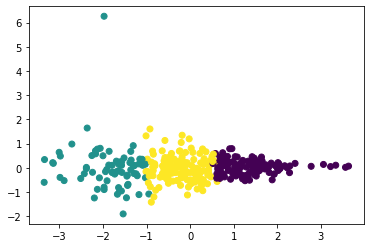

In [189]:
pca = PCA(n_components=2)
X = pca.fit_transform(result.iloc[:, :167])
plt.scatter(X[:, 0], X[:, 1], c = result.iloc[:, 167])

In [182]:
df4 = df3.resample('1D').mean()

In [196]:
df4 = df4.T

In [197]:
result = kmeans(df4)
result.head()

,0,1,2,3,4,5,6,7
d6fd26b7,0.193833,0.763957,0.654333,0.678625,0.684875,0.164958,0.158167,1.0
410b92b1,0.281917,0.255652,0.225958,0.267833,0.255000,0.263458,0.322000,2.0
2c993de7,0.428250,0.354304,0.358250,0.417917,0.505458,0.480958,0.526333,1.0
1243cee2,0.101583,0.106261,0.098833,0.360458,0.286667,0.345208,0.258708,0.0
b01fe23c,0.370708,0.401087,0.670125,0.550167,0.484458,0.486333,0.444917,1.0


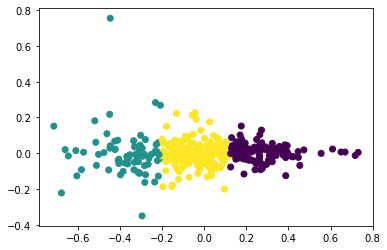

In [198]:
pca = PCA(n_components=2)
X = pca.fit_transform(result.iloc[:, :7])
plt.scatter(X[:, 0], X[:, 1], c = result.iloc[:, 7])